NCR


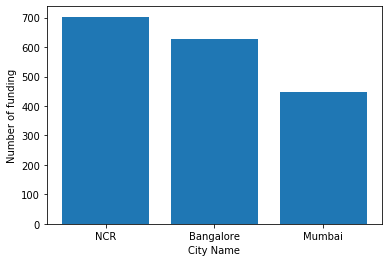

In [152]:
# Question 1
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Nehad\OneDrive\Desktop\startup_funding.csv",encoding="unicode_escape")
df.dropna(subset=["CityLocation"],inplace=True)
df["CityLocation"].replace("Delhi","New Delhi",inplace=True)
df["CityLocation"]=df["CityLocation"].str.title()
d={}
for i in df["CityLocation"]:
    if i=="Bangalore":
        d[i]=d.get(i,0)+1
    elif i=="Mumbai":
        d[i]=d.get(i,0)+1
    elif i=="New Delhi"or i=="Gurgaon" or i=="Noida" :
        d["NCR"]=d.get("NCR",0)+1
    if "," in i:
        li=i.split("/")
        for j in li:
            j=j.strip()
            if j=="Bangalore":
                d[j]=d.get(i,0)+1
            if j=="Mumbai":
                d[j]=d.get(i,0)+1
            if j=="New Delhi" or j=="Gurgaon" or j=="Noida":
                d["NCR"]=d.get("NCR",0)+1
                
   
dictionary=dict(sorted(d.items(),key=lambda i:i[1],reverse=True))
answer=max(dictionary,key=dictionary.get)
print(answer)
plt.bar(dictionary.keys(),dictionary.values())
plt.xlabel("City Name")
plt.ylabel("Number of funding")
plt.show()

#### To get the city(preferred choices are Bangalore,New Delhi and NCR) where the number of fundings are maximum, we will follow the following steps
1)Importing the required libraries which are Numpy,Pandas and matplotlib
2)Cleaning the data in which I removed rows with missing citylocation,replaced "Delhi" with "New Delhi" using .replace function 
and capitilized the values of column with name "CityLocation" using.title function
3)Creating a dictionary with keys as city location and values as the number of times funding were there in these cities.Here we have taken a special care of the cases where multiple location are there in single cell(used split and strip function).
4)Sorting the dictionary in descending order and printing the citylocation with max value
5)Using the .plt.bar function to create the bar graph between the keys of dictionary("Cityname") and values of dictionary("Number of funding")
6)using the plt.xlabel and ylabel function for labelling the graph and finally plotting it
#### Output-NCR turns out to be the recquired city where maximum number of funding are happening

In [153]:
#Question-2
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\Nehad\OneDrive\Desktop\startup_funding.csv",encoding="unicode_escape")
df['InvestorsName'].dropna(inplace=True)
def createDictionary(x):
    dictionary={}
    for i in x:
        if ',' not in i:
            if i in dictionary:
                dictionary[i]=dictionary.get(i)+1
            else:
                dictionary[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                else:
                    dictionary[j.strip()]=1
    return dictionary

dictionary=createDictionary(df['InvestorsName'])

sorted_d = dict( sorted(dictionary.items(), key=lambda i:i[1],reverse=True))
sorted_d
count=0
for i in sorted_d:
    if count==5:
        break
    print(i)
    count=count+1
 



Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


#### To get the list of top 5 investors who have invested maximum number of times, we will proceed with the following steps
1)Importing the necessary libraries which are numpy and Pandas.
2)loading the file in a variable df using.read_csv function of pandas.
3)removing the NaN values from column "InvestorsName".
4)Creating a dictionary d where keys are Inverstor name and values are the number of times the respective investor invested
5)To create this dictionary,we splitted each value in column "InvestorName"with delimiter "," incase it exists.We did so to cater to the fact that each value in this column can have multiple investors name.
6)Once the dictionary is created,We now have the count of every investor (By count ,we mean the number of times the investor invested)
7)sorting the dictionary in descending order according to the values using the sorted and lambda function.
8)Printing the first 5 keys of the sorted dictionary
#### Output shows that Sequoia Capital invested maximum number of times followed by Accel Partners then Kalaari Capital.....
The list is as follows
1)Sequoia Capital
2)Accel Partners
3)Kalaari Capital
4)SAIF Partners
5)Indian Angel Network

In [154]:
#question-3
import pandas as pd
df=pd.read_csv(r"C:\Users\Nehad\OneDrive\Desktop\startup_funding.csv",encoding="unicode_escape")
df.dropna(subset=["InvestorsName","StartupName"],inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
#creating a dictionary where the keys will be investors name and values will be a set of startups in which the respctive investor invested
d={}
for i in df.index:
    investor=df["InvestorsName"][i].strip()
    if "," in investor:
        l=investor.split(",")
        for ele in l:
            ele=ele.strip()
            if ele in d:
                d[ele].add(df["StartupName"][i].strip())
            else:
                d[ele]=set()
                d[ele].add(df["StartupName"][i].strip())
    else:
        a=investor.strip()
        if a in d:
            d[a].add(df["StartupName"][i].strip())
        else:
            d[a]=set()
            d[a].add(df["StartupName"][i].strip())
d1={}
for i in d:
    if i=="":
        continue
    d1[i]=len(d[i])
final_dict=sorted(d1.items(),key=lambda i:i[1],reverse=True)[0:5]
for i in final_dict:
    print(i[0])



Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


####  To find the top 5 investors who have invested in different number of startups,we will proceed with the following steps
1)Importing the necessary libararies which are numpy and pandas
2)loading the file in a variable df using.read_csv function of pandas.
3)removing the NaN values from column "InvestorsName" and "StartupName".
4)Cleaning the data by correcting the names of important startups in the dataset using .replace function
5)creating a dictionary where the keys will be investors name and values will be a set of startups in which the respctive investor invested(set is created to ensure that only unique names are added)
6)creating another dictionary with the help of previous ones where the keys in new dict are same as previous ones and the values are the length of the set in the previous dict
7)Sorting the latest dictionary in descending order and printing the first 5 values
#### Output is as follows where Sequoia Capital invested maximum number of times in different startups
The list is as follows
1)Sequoia Capital
2)Accel Partners
3)Kalaari Capital
4)Indian Angel Network
5)Blume Ventures

In [155]:
# Question-4
import pandas as pd
df=pd.read_csv(r"C:\Users\Nehad\OneDrive\Desktop\startup_funding.csv",encoding="unicode_escape")
df.dropna(subset=["InvestorsName","StartupName"],inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)
d={}
for i in df.index:
    investor=df["InvestorsName"][i].strip()
    if (df["InvestmentType"][i]=="Seed Funding") or (df["InvestmentType"][i]=="Crowd Funding"):
        if "," in investor:
            l=investor.split(",")
            for ele in l:
                ele=ele.strip()
                if ele in d:
                    d[ele].add(df["StartupName"][i].strip())
                else:
                    d[ele]=set()
                    d[ele].add(df["StartupName"][i].strip())
        else:
            a=investor.strip()
            if a in d:
                d[a].add(df["StartupName"][i].strip())
            else:
                d[a]=set()
                d[a].add(df["StartupName"][i].strip())
d1={}
for i in d:
    if i=="":
        continue
    d1[i]=len(d[i])
final_dict=sorted(d1.items(),key=lambda i:i[1],reverse=True)
count=0
i=0
while count<5:
    if final_dict[i][0]!="Undisclosed Investors"and final_dict[i][0]!="Undisclosed investors":
        print(final_dict[i][0])
        count=count+1
    i=i+1
    




Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


#### to find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding, we will proceed with the following steps
1)Importing the necessary libararies which are numpy and pandas
2)loading the file in a variable df using.read_csv function of pandas.
3)removing the NaN values from column "InvestorsName" and "StartupName".
4)Cleaning the data by correcting the names of important startups and the spelling of different investment types in the dataset using .replace function
5)creating a dictionary where the keys will be investors name and values will be a set of startups in which the respctive investor invested(set is created to ensure that only unique names are added).Here we will keep a check that only those investors will be included whose investment type is Crowdfunding or Seedfunding
6)creating another dictionary with the help of previous ones where the keys in new dict are same as previous ones and the values are the length of the set in the previous dict
7)Sorting the latest dictionary in descending order and printing the first 5 values.Here we will keep a check that Undisclosed Investors should not be considered in our list
#### Output is as follows-
1)Indian Angel Network
2)Rajan Anandan
3)LetsVenture
4)Anupam Mittal
5)Kunal Shah

In [156]:
#Question-5
import pandas as pd
df=pd.read_csv(r"C:\Users\Nehad\OneDrive\Desktop\startup_funding.csv",encoding="unicode_escape")
df.dropna(subset=["InvestorsName","StartupName"],inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)
d={}
for i in df.index:
    investor=df["InvestorsName"][i].strip()
    if (df["InvestmentType"][i]=="Private Equity"):
        if "," in investor:
            l=investor.split(",")
            for ele in l:
                ele=ele.strip()
                if ele in d:
                    d[ele].add(df["StartupName"][i].strip())
                else:
                    d[ele]=set()
                    d[ele].add(df["StartupName"][i].strip())
        else:
            a=investor.strip()
            if a in d:
                d[a].add(df["StartupName"][i].strip())
            else:
                d[a]=set()
                d[a].add(df["StartupName"][i].strip())
d1={}
for i in d:
    if i=="":
        continue
    d1[i]=len(d[i])
final_dict=sorted(d1.items(),key=lambda i:i[1],reverse=True)
count=0
i=0
while count<5:
    if final_dict[i][0]!="Undisclosed Investors"and final_dict[i][0]!="Undisclosed investors":
        print(final_dict[i][0])
        count=count+1
    i=i+1

    


Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners


#### To find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity, we will proceed with the following steps
1)Importing the necessary libararies which are numpy and pandas
2)loading the file in a variable df using.read_csv function of pandas.
3)removing the NaN values from column "InvestorsName" and "StartupName".
4)Cleaning the data by correcting the names of important startups and the spelling of different investment types in the dataset using .replace function
5)creating a dictionary where the keys will be investors name and values will be a set of startups in which the respctive investor invested(set is created to ensure that only unique names are added).Here we will keep a check that only those investors will be included whose investment type is Private Equity
6)creating another dictionary with the help of previous ones where the keys in new dict are same as previous ones and the values are the length of the set in the previous dict
7)Sorting the latest dictionary in descending order and printing the first 5 values.Here we will keep a check that Undisclosed Investors should not be considered in our list
#### Output is as follows
1)Sequoia Capital
2)Accel Partners
3)Kalaari Capital
4)Blume Ventures
5)SAIF Partners